# CCDPApy Tutorial

## 1. Template of Input Data File

### Fed-batch Cell Culture

[Fed-batch Cell Culture Data File](URL)

## 2. Parameter Settings

### 2.1 Different Measurements

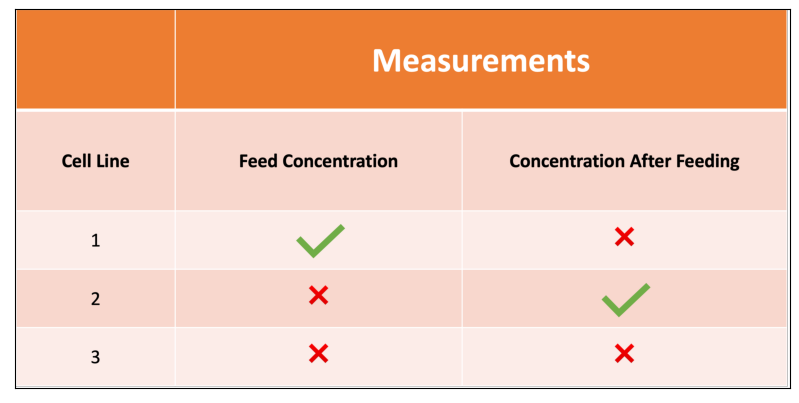

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("/Users/galileo/development/Reserch/UMN_Research/CCDPA_git/CCDPApy/pic1.png")
plt.figure(figsize=(10, 6))
plt.imshow(img)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

### 2.2 Cell Line 1

In [2]:
from CCDPApy import FedBatchParameters

param_1 = FedBatchParameters(cell_line_name='CL1',
                             use_concentration_after_feed=False,
                             use_feed_concentration=True,
                             regression_method=['polynomial', 'rolling_window_polynomial'],
                             rolling_polynomial_degree=3,
                             rolling_polynomial_window=6)
param_1

Cell Line: CL1
Feed concentration will be used: True
Concentration after feeding will be used: False
Regression Methods
     Polynomial: True
     Rolling window polynomial True

### 2.3 Cell Line 2

In [3]:
from CCDPApy import FedBatchParameters

param_2 = FedBatchParameters(cell_line_name='CL2',
                             use_concentration_after_feed=True,
                             use_feed_concentration=False,
                             regression_method=['polynomial', 'rolling_window_polynomial'],
                             rolling_polynomial_degree=3,
                             rolling_polynomial_window=6)
param_2

Cell Line: CL2
Feed concentration will be used: False
Concentration after feeding will be used: True
Regression Methods
     Polynomial: True
     Rolling window polynomial True

## 3. Importing Cell Culture Data Into Package

In [4]:
from CCDPApy import cell_culture_pipeline

measured_data_file = 'fed_batch_data.xlsx'
fed_batch = cell_culture_pipeline(cell_culture_type='fed-batch', file=measured_data_file)
# fed_batch = cell_culture_pipeline(cell_culture_type='pefusion', file=measured_data_file)

## 4. Data Processing and Exporting Processed Data

### 4.1 Performing Data Processing

In [5]:
fed_batch.perform_data_process([param_1, param_2])

### 4.2 Exporting Data as an Excel File

In [6]:
fed_batch.save_excel(file_name='fed_batch_output.xlsx')

fed_batch_output.xlsx  saved.


## 5. Interactive Plot

In [7]:
fed_batch.interactive_plot(port=8800)

Dash is running on http://127.0.0.1:8800/



## 6. Data Aggregation

### 6.1 Parameter Setting and Data Processing: CL3

In [8]:
from CCDPApy import FedBatchParameters, cell_culture_pipeline

# Parameter setting
param_3 = FedBatchParameters(cell_line_name='CL3',
                             use_concentration_after_feed=False,
                             use_feed_concentration=False,
                             regression_method=['polynomial', 'rolling_window_polynomial'],
                             rolling_polynomial_degree=3,
                             rolling_polynomial_window=6)

# Importing data file
measured_data_file = 'fed_batch_data.xlsx'
fed_batch_2 = cell_culture_pipeline(cell_culture_type='fed-batch', file=measured_data_file)

# Performing data analysis
fed_batch_2.perform_data_process(parameters=param_3)

### 6.2 Importing the Proccessed Data of CL1 and CL2

In [9]:
processed_file = 'fed_batch_output.xlsx'
fed_batch_2.import_data(file_name=processed_file)